![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

# **Import Libraries**

In [11]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# **Load Datasets**

In [12]:
# Load the data
bd_workout = pd.read_csv("data/workout.csv")
print(bd_workout.head(5))

     month  workout_worldwide
0  2018-03                 59
1  2018-04                 61
2  2018-05                 57
3  2018-06                 56
4  2018-07                 51


In [13]:
# Load the data
bd_three_keywords = pd.read_csv("data/three_keywords.csv")
print(bd_three_keywords.head(5))

     month  home_workout_worldwide  gym_workout_worldwide  home_gym_worldwide
0  2018-03                      12                     16                  10
1  2018-04                      12                     18                  10
2  2018-05                      13                     16                   9
3  2018-06                      12                     17                   9
4  2018-07                      12                     17                   9


In [14]:
# Load the data
bd_workout_geo = pd.read_csv("data/workout_geo.csv")
print(bd_workout_geo.head(5))

                             country  workout_2018_2023
0                               Guam                NaN
1  Falkland Islands (Islas Malvinas)                NaN
2                       Cook Islands                NaN
3                             Brunei                NaN
4                              Palau                NaN


In [15]:
# Load the data
bd_three_keywords_geo = pd.read_csv("data/three_keywords_geo.csv")
bd_three_keywords_geo = bd_three_keywords_geo.rename(columns={"Country": "country"})
print(bd_three_keywords_geo.head(5))

     country  home_workout_2018_2023  gym_workout_2018_2023  home_gym_2018_2023
0  Gibraltar                     NaN                    NaN                 NaN
1    Lesotho                     NaN                    NaN                 NaN
2       Guam                     NaN                    NaN                 NaN
3   Botswana                     NaN                    NaN                 NaN
4     Brunei                     NaN                    NaN                 NaN


# **Merged Datasets**

In [16]:
# Load the data
words = bd_workout.merge(bd_three_keywords,how='inner', on='month')
words.head(5)

,month,workout_worldwide,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,59,12,16,10
1,2018-04,61,12,18,10
2,2018-05,57,13,16,9
3,2018-06,56,12,17,9
4,2018-07,51,12,17,9


In [17]:
# Load the data
geo = bd_workout_geo.merge(bd_three_keywords_geo,how='inner', on='country')
geo.head(5)

,country,workout_2018_2023,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Guam,NaN,NaN,NaN,NaN
1,Falkland Islands (Islas Malvinas),NaN,NaN,NaN,NaN
2,Cook Islands,NaN,NaN,NaN,NaN
3,Brunei,NaN,NaN,NaN,NaN
4,Palau,NaN,NaN,NaN,NaN


# **Answer 1: Workout trend**
When was the global search for 'workout' at its peak? Save the year of peak interest as a string named year_str in the format "yyyy".

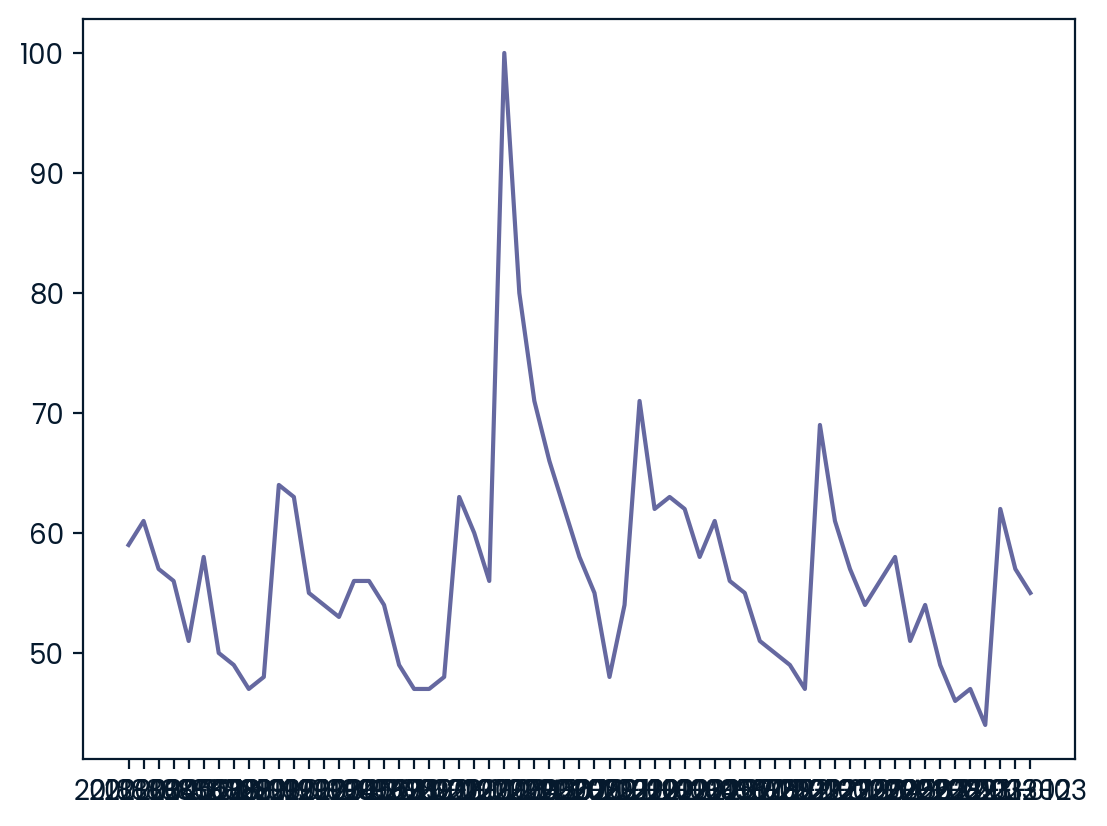

In [18]:
plt.plot(words["month"],words["workout_worldwide"])
plt.show()

In [19]:
# Convertir 'month' a tipo datetime
words["month"] = pd.to_datetime(words["month"])

# Extraer el año
words["year"] = words["month"].dt.year

# Agrupar por año y obtener el valor máximo de workout_worldwide
df_yearly_max = words.groupby("year")["workout_worldwide"].max().reset_index()

# Encontrar el año con el valor más alto
peak_year = df_yearly_max.loc[df_yearly_max["workout_worldwide"].idxmax(), "year"]
year_str = str(peak_year)

# Mostrar resultado
print("El año con el pico más alto de 'workout_worldwide' es:")
print(year_str)

El año con el pico más alto de 'workout_worldwide' es:
2020


# **Answer 2: Peak keywords trend**
Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? Save your answers as variables called peak_covid and current respectively.

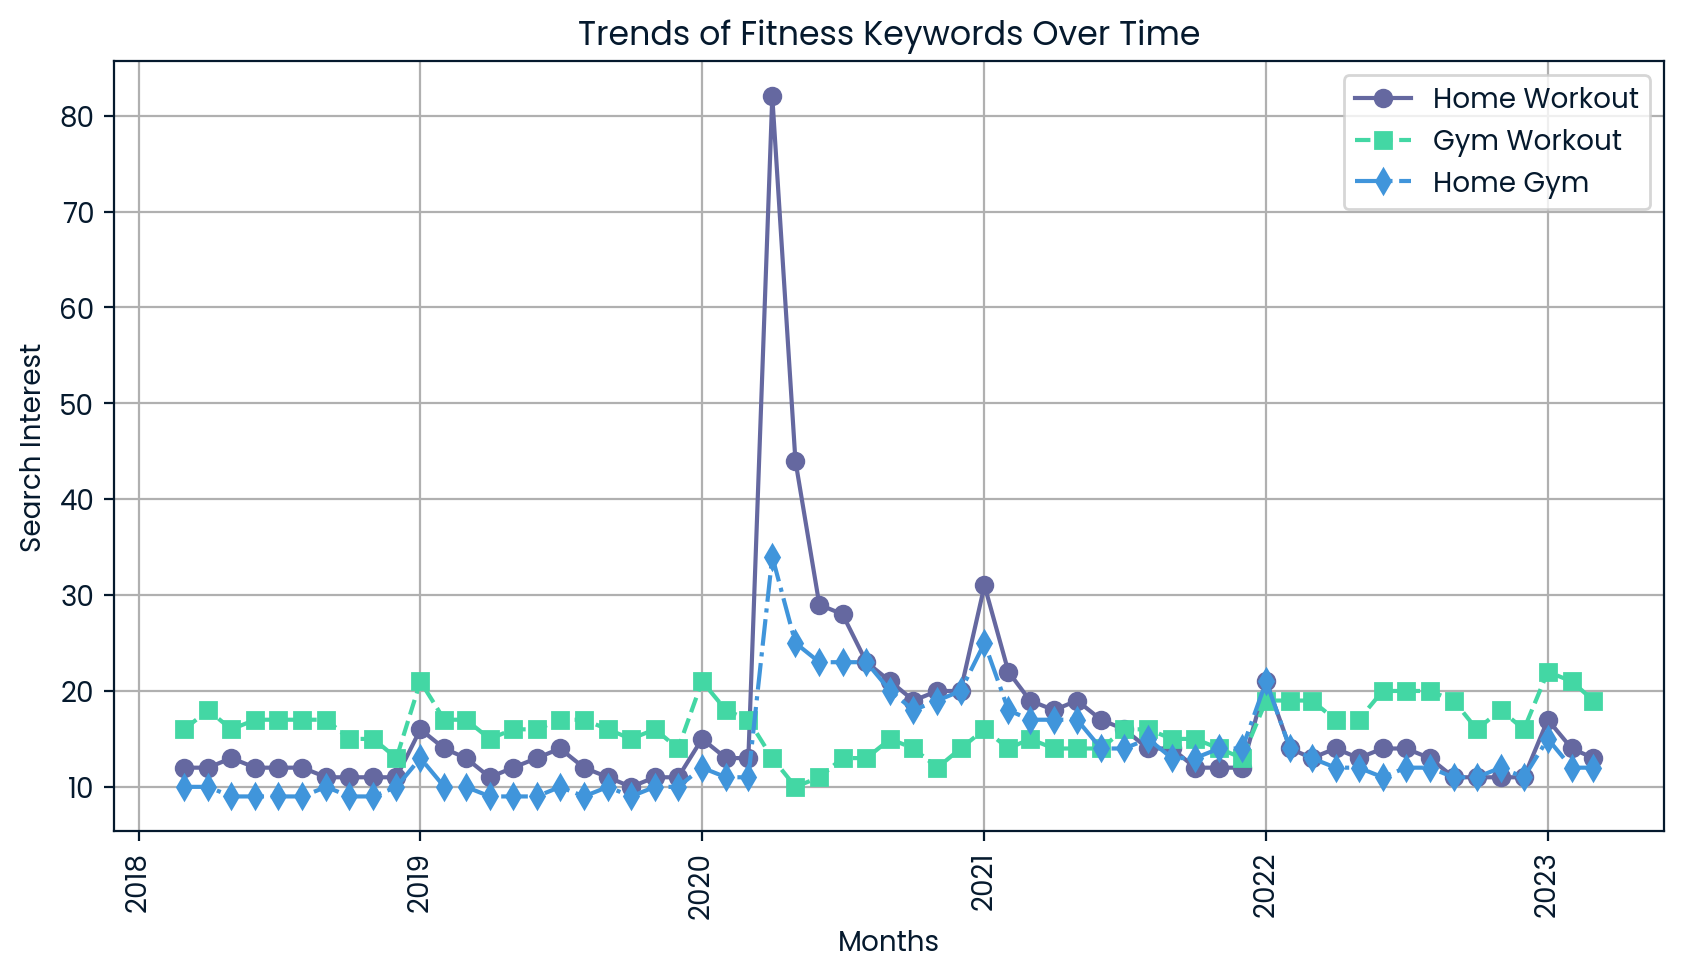

In [20]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(words["month"], words["home_workout_worldwide"], label='Home Workout', marker='o', linestyle='-')
ax.plot(words["month"], words["gym_workout_worldwide"], label='Gym Workout', marker='s', linestyle='--')
ax.plot(words["month"], words["home_gym_worldwide"], label='Home Gym', marker='d', linestyle='-.')

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Search Interest')
ax.set_title('Trends of Fitness Keywords Over Time')
ax.legend()
ax.grid(True)

# Rotate x-axis labels 180 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [21]:
peak_covid = "home workout"
current = "Gym workout"

# **Answer 3: Top countries with nterests for workouts**
What country has the highest interest for workouts among the following: United States, Australia, or Japan? Save your answer as top_country.

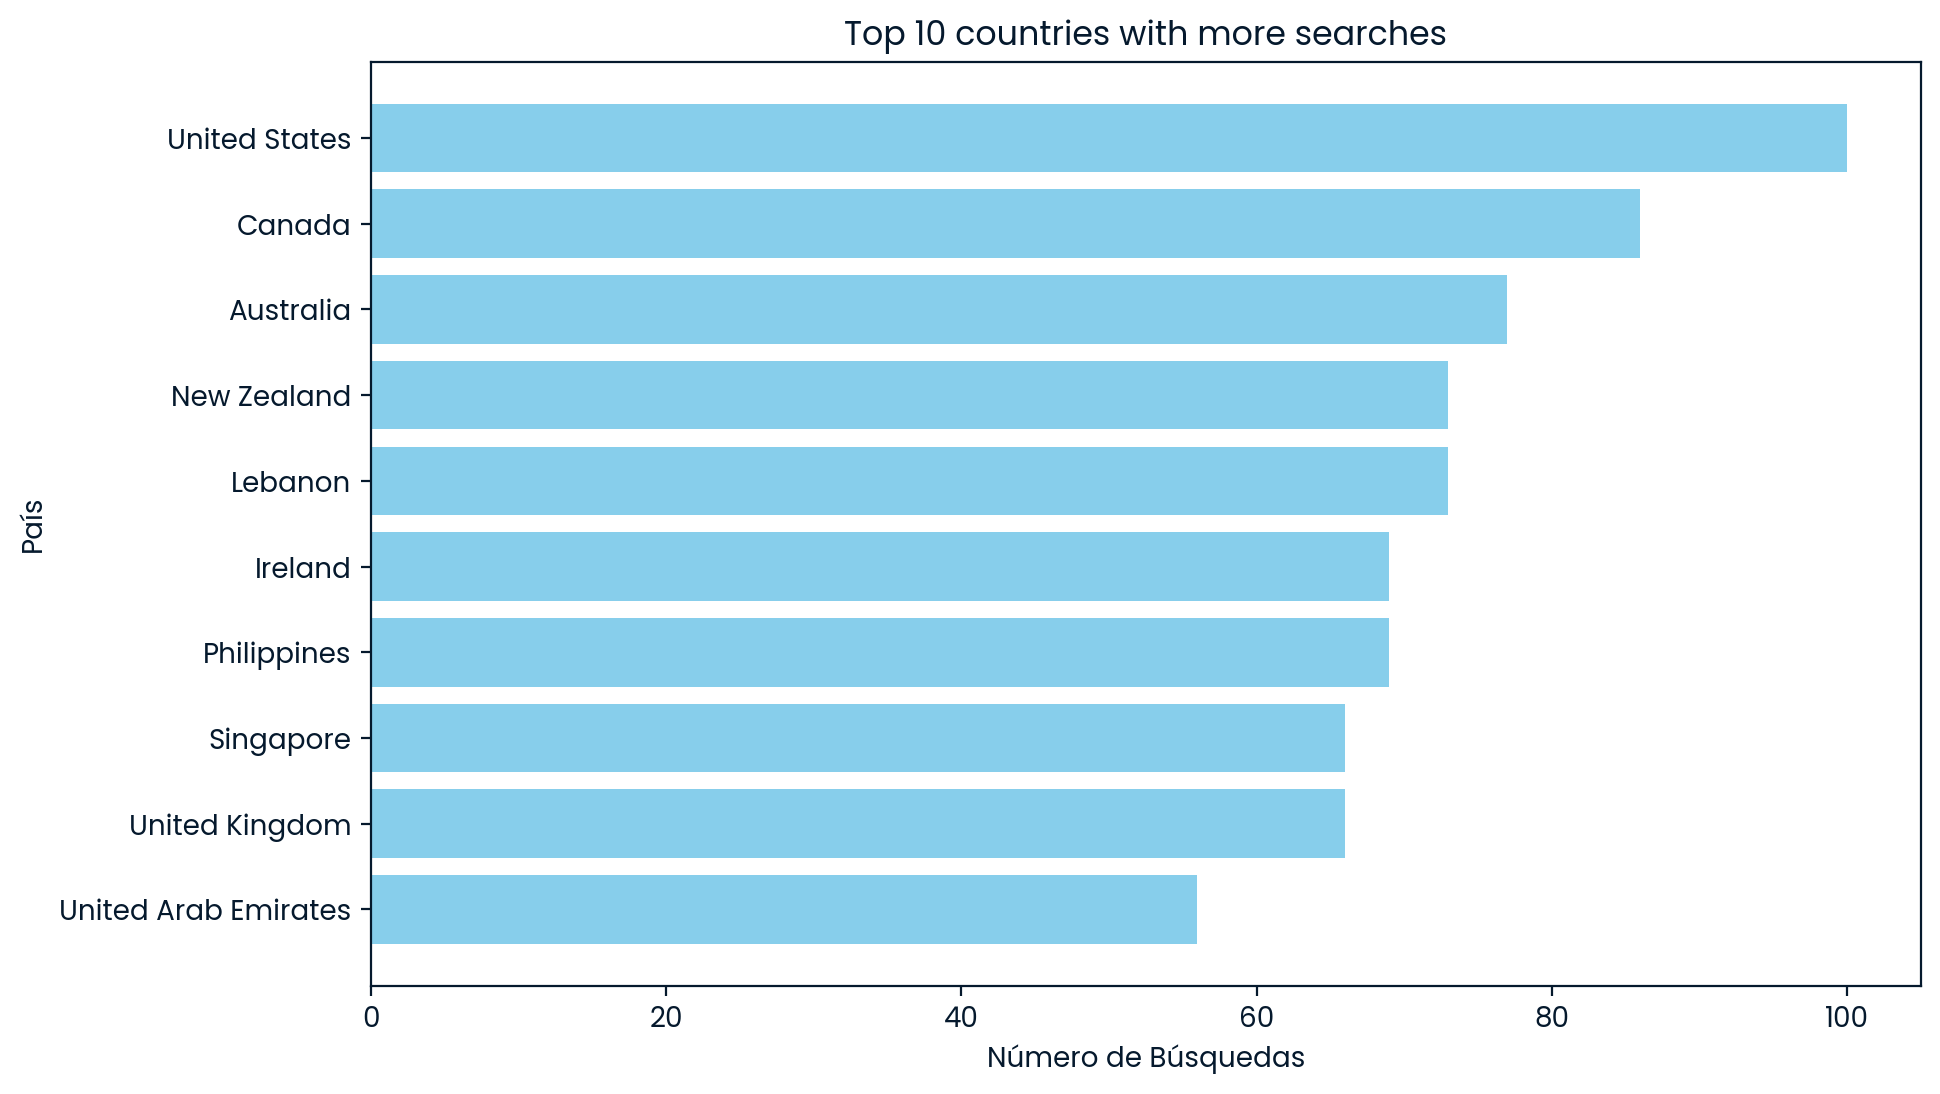

In [22]:
# Filtrar los 10 países con más búsquedas
df_top10 = geo.nlargest(10, "workout_2018_2023")

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras
ax.barh(df_top10["country"], df_top10["workout_2018_2023"], color="skyblue")

# Personalización del gráfico
ax.set_xlabel("Número de Búsquedas")
ax.set_ylabel("País")
ax.set_title("Top 10 countries with more searches")
ax.invert_yaxis()  # Invierte el eje Y para que el país con más búsquedas esté arriba

# Mostrar el gráfico
plt.show()

In [23]:
top_country = "United States"

# **Answer 4: Interests for home workouts by MESA countries**
You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? Identify the country and save it as home_workout_geo.

In [24]:
# Lista de países MESA en inglés
mesa_countries = [
"Saudi Arabia", "United Arab Emirates", "Qatar", "Kuwait", "Oman", "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Lebanon", "Syria", "Turkey", "Yemen", "Egypt", "Algeria", "Libya", "Morocco", "Sudan", "Tunisia", "Malaysia","India", "Pakistan", "Bangladesh", "Afghanistan", "Sri Lanka", "Nepal", "Maldives", "Bhutan","Philippines"]

# Filtrar solo los países MESA
df_mesa = geo[geo["country"].isin(mesa_countries)]

# Ordenar por interés en home workouts (de mayor a menor)
df_mesa_sorted = df_mesa.sort_values(by="home_workout_2018_2023", ascending=False)

# Obtener el país con más interés
top_country_MESA = df_mesa_sorted.iloc[:]

# Mostrar resultado
print("the country in the MESA region with the highest interest in home workouts is:")
print(top_country_MESA)

the country in the MESA region with the highest interest in home workouts is:
                  country  ...  home_gym_2018_2023
203                  Iran  ...                17.0
31            Philippines  ...                10.0
189                Turkey  ...                19.0
72               Malaysia  ...                15.0
134                 Egypt  ...                13.0
143            Bangladesh  ...                24.0
141          Saudi Arabia  ...                30.0
79              Sri Lanka  ...                24.0
47   United Arab Emirates  ...                21.0
91               Pakistan  ...                23.0
83                  India  ...                22.0
23                Lebanon  ...                 NaN
38               Maldives  ...                 NaN
53                  Qatar  ...                 NaN
54                 Bhutan  ...                 NaN
55                Bahrain  ...                 NaN
62            Afghanistan  ...                 NaN
70  

In [25]:
home_workout_geo = "Philippines"